Projet-UE4:

GUNDUZ Maxime
AIT SAID Hicham

2025 : Master 2 Informatique Médical

Parti 1 : Comparaison de modeles supervisé, non supervisé

{0: {0.050000000000000044: 0.8181818181818182, 0.09999999999999998: 0.9333333333333333, 0.15000000000000002: 0.921875, 0.19999999999999996: 0.9333333333333333, 0.25: 0.9646017699115044, 0.30000000000000004: 0.9619047619047619, 0.35: 0.9489795918367347, 0.4: 0.9555555555555556, 0.44999999999999996: 0.9518072289156626, 0.5: 0.9466666666666667, 0.55: 0.9411764705882353, 0.6: 0.9333333333333333, 0.65: 0.9622641509433962, 0.7: 0.9782608695652174, 0.75: 0.9736842105263158, 0.8: 1.0, 0.85: 0.9565217391304348, 0.9: 0.9333333333333333}, 1: {0.050000000000000044: 0.8321678321678322, 0.09999999999999998: 0.9407407407407408, 0.15000000000000002: 0.953125, 0.19999999999999996: 0.925, 0.25: 0.9292035398230089, 0.30000000000000004: 0.9523809523809523, 0.35: 0.9591836734693877, 0.4: 0.9333333333333333, 0.44999999999999996: 0.9518072289156626, 0.5: 0.9466666666666667, 0.55: 0.9705882352941176, 0.6: 0.9666666666666667, 0.65: 0.9622641509433962, 0.7: 0.9565217391304348, 0.75: 0.9736842105263158, 0.8: 0.9

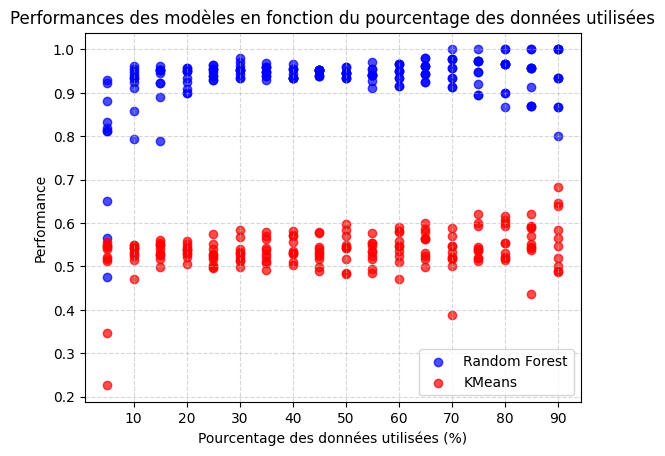

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

def test_model(dataset, machine_learning, nb):
    X = dataset.data
    y = dataset.target
    resPrediction = {}

    for j in range(10):
        resByIteration = {}

        for i in range(1, nb + 1):
            test_size = 1 - (i / nb)
            if test_size <= 0.1:
                test_size = 0.1

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=j)

            if machine_learning == "forest":
                rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
                rf_classifier.fit(X_train, y_train)
                y_pred = rf_classifier.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                resByIteration[1 - test_size] = accuracy

            elif machine_learning == "k-means":
                kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=42)
                kmeans.fit(X_train)
                silhouette_avg = silhouette_score(X_test, kmeans.predict(X_test))
                resByIteration[1 - test_size] = silhouette_avg

        resPrediction[j] = resByIteration

    return resPrediction


def draw_combined_graph(results_forest, results_kmeans):
    x_forest, y_forest = [], []
    for iteration, data in results_forest.items():
        for test_size, performance in data.items():
            x_forest.append(test_size)
            y_forest.append(performance)

    x_kmeans, y_kmeans = [], []
    for iteration, data in results_kmeans.items():
        for test_size, performance in data.items():
            x_kmeans.append(test_size)
            y_kmeans.append(performance)

    plt.scatter(x_forest, y_forest, c='blue', label="Random Forest", alpha=0.7)
    plt.scatter(x_kmeans, y_kmeans, c='red', label="KMeans", alpha=0.7)

    plt.xlabel("Pourcentage des données utilisées (%)")
    plt.ylabel("Performance")
    plt.title("Performances des modèles en fonction du pourcentage des données utilisées")
    plt.xticks(
        np.linspace(0.1, 0.9, 9),
        labels=[int(x * 100) for x in np.linspace(0.1, 0.9, 9)]
    )
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()


iris = datasets.load_iris()
results_forest = test_model(iris, "forest", 20)
results_kmeans = test_model(iris, "k-means", 20)

print(results_forest)
print(results_kmeans)

draw_combined_graph(results_forest, results_kmeans)


Parti 2 : Conception de Modele

Prerequis


In [ ]:
!git clone https://github.com/manalland/simsamu.git

import tensorflow as tf
print(tf.test.gpu_device_name())
device = "cuda"

Cloning into 'simsamu'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (318/318), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 318 (delta 120), reused 318 (delta 120), pack-reused 0 (from 0)
Receiving objects: 100% (318/318), 583.06 KiB | 1.89 MiB/s, done.
Resolving deltas: 100% (120/120), done.
Error downloading object: dj_2022_3_mois_paracetamol/dj_2022_3_mois_paracetamol.m4a (7c3ba37): Smudge error: Error downloading dj_2022_3_mois_paracetamol/dj_2022_3_mois_paracetamol.m4a (7c3ba37ecc65e17fac4f140069a02535c708cc6a1dff15c01662aa0aa950fe0a): [7c3ba37ecc65e17fac4f140069a02535c708cc6a1dff15c01662aa0aa950fe0a] Object does not exist on the server: [404] Object does not exist on the server

Errors logged to /content/simsamu/.git/lfs/logs/20250103T192123.59572599.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: dj_2022_3_mois_paracetamol/dj_2022_3_mois_paracetamol.m4a: smudge filte

Traitement du jeu de données

In [ ]:
import os

discussions_samu = []

def extract_speaker_dialogue(rttm_content, srt_content):
    speaker_segments = []
    for line in rttm_content.split('\n'):
        if line.strip():
            parts = line.split()
            if len(parts) >= 8:
                start_time = float(parts[3])
                duration = float(parts[4])
                end_time = start_time + duration
                speaker_role = parts[7]
                speaker_segments.append({
                    'start': start_time,
                    'end': end_time,
                    'speaker': speaker_role
                })

    dialogue_segments = []
    current_segment = None

    for line in srt_content.split('\n'):
        line = line.strip()
        if line.isdigit():
            if current_segment:
                dialogue_segments.append(current_segment)
            current_segment = {'time': None, 'text': ''}
        elif '-->' in line:
            times = line.split(' --> ')
            start_time = convert_srt_time_to_seconds(times[0])
            current_segment['time'] = start_time
        elif line:
            if current_segment:
                current_segment['text'] += ' ' + line if current_segment['text'] else line

    if current_segment:
        dialogue_segments.append(current_segment)

    result = {}
    for dialogue in dialogue_segments:
        for speaker in speaker_segments:
            if abs(dialogue['time'] - speaker['start']) < 0.5:
                speaker_type = speaker['speaker']
                if speaker_type not in result:
                    result[speaker_type] = []
                result[speaker_type].append(dialogue['text'].strip())
                break

    return result

def convert_srt_time_to_seconds(time_str):
    hours, minutes, seconds = time_str.replace(',', '.').split(':')
    return float(hours) * 3600 + float(minutes) * 60 + float(seconds)

def process_conversation_files(rttm_file_path, srt_file_path):
    with open(rttm_file_path, 'r', encoding='utf-8') as rttm_file:
        rttm_content = rttm_file.read()

    with open(srt_file_path, 'r', encoding='utf-8') as srt_file:
        srt_content = srt_file.read()

    return extract_speaker_dialogue(rttm_content, srt_content)

def get_all_discussions(root_dir):
    for dirpath, dirnames, filenames in sorted(os.walk(root_dir)):
        dirnames.sort()
        rttm_files = sorted([f for f in filenames if f.endswith('.rttm')])
        srt_files = sorted([f for f in filenames if f.endswith('.srt')])

        for rttm_file in rttm_files:
            base_name = os.path.splitext(rttm_file)[0]
            srt_file = base_name + '.srt'

            if srt_file in srt_files:
                rttm_path = os.path.join(dirpath, rttm_file)
                srt_path = os.path.join(dirpath, srt_file)

                result = process_conversation_files(rttm_path, srt_path)
                discussions_samu.append(result)

root_directory = "/content/simsamu"
get_all_discussions(root_directory)

print(f"Nombre de discussions : {len(discussions_samu)}")
print(discussions_samu[0])
print(discussions_samu)





Nombre de discussions : 61
{'patient': ['allo?', 'oui allo, allo?', "oui c'est ça c'est ça, exactement", "ça fait heu j'attends depuis longtemps là", "oui c'est ça c'est ça, je pense heu ça fait beaucoup de médicaments là. je sais pas heu quoi faire, j'attends depuis très longtemps maintenant", "oui mais moi j'attends quoi, hein", "bah c'est du para- paracétamol là vous savez?", "bah je sais pas enfin moi euh j'ai l'habi-, enfin j'ai que qu'un enfant. j'en donne j'ai j'ai j'ai je prends pas l'habitude d'en donner. mais là je pense que j'ai donné une grande dose. trois fois la dose qu'il faut j'aurais dû donner, et moi on me dit pas quoi faire du coup moi là j'attends, je sais pas quoi faire voyez?", "qu'est ce que je dois faire là?", "mais moi là il faut que je donne quoi? qu'est ce qui faut que je donne? j'ai pas compris", "oui mais est ce qu'il faut le faire vomir? on m'a dit qu'il fallait le faire vomir", "d'accord ils arrivent dans combien de temps? parce que moi j'attends là depui

Réalisation de TF_IDF

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-ZÀ-ÿ\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def prepare_and_encode_data(discussions_samu, max_features=5000, min_df=2):
    texts = []
    labels = []

    for discussion in discussions_samu:
        for speaker, phrases in discussion.items():
            if speaker in ['medecin', 'patient']:
                for phrase in phrases:
                    if isinstance(phrase, str) and phrase.strip():
                        texts.append(preprocess_text(phrase))
                        labels.append(speaker)

    custom_stop_words = set(stopwords.words('french'))
    custom_stop_words.update(['heu', 'euh', 'hum', 'bah'])

    vectorizer = TfidfVectorizer(
        max_features=max_features,
        min_df=min_df,
        max_df=0.95,
        stop_words=list(custom_stop_words),
        ngram_range=(1, 2)
    )
    X = vectorizer.fit_transform(texts)

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(labels)

    feature_names = vectorizer.get_feature_names_out()
    X_array = X.toarray()
    feature_importance = {}

    for i, class_label in enumerate(label_encoder.classes_):
        class_importance = X_array[y == i].mean(axis=0)
        top_indices = np.argsort(class_importance)[-15:][::-1]

        feature_importance[class_label] = [
            (feature_names[idx], class_importance[idx])
            for idx in top_indices
        ]

    return X, y, vectorizer, label_encoder, feature_importance

X, y, vectorizer, label_encoder, feature_importance = prepare_and_encode_data(discussions_samu)

print(f"Forme de la matrice TF-IDF : {X.shape}")
print(f"Nombre total de phrases : {len(y)}")
print(f"Distribution des classes : {np.bincount(y)}")
print("\nMots les plus importants par classe :")
for classe, mots in feature_importance.items():
    print(f"\n{classe.upper()} :")
    for mot, importance in mots:
        print(f"- {mot}")

np.save('X_tfidf.npy', X.toarray())
np.save('y_encoded.npy', y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Forme de la matrice TF-IDF : (3061, 2625)
Nombre total de phrases : 3061
Distribution des classes : [1594 1467]

Mots les plus importants par classe :

MEDECIN :
- accord
- madame
- ça
- ok
- revoir
- là
- oui
- médecin
- si
- donc
- va
- bien
- bonjour
- faut
- allo

PATIENT :
- non
- oui
- là
- ça
- accord
- ouais
- ok
- sais
- revoir
- hein
- non non
- fait
- allo
- quoi
- bonjour


Conception Modele Regression Lineaire

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(



Meilleurs paramètres : {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__l1_ratio': 0.2, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'saga', 'feature_selection__threshold': 'median'}
Meilleur score CV : 0.7762

Résultats sur l'ensemble de test:
Accuracy: 0.8042

Rapport de classification:
              precision    recall  f1-score   support

     medecin       0.79      0.86      0.82       319
     patient       0.83      0.74      0.78       294

    accuracy                           0.80       613
   macro avg       0.81      0.80      0.80       613
weighted avg       0.81      0.80      0.80       613



<Figure size 1000x800 with 0 Axes>

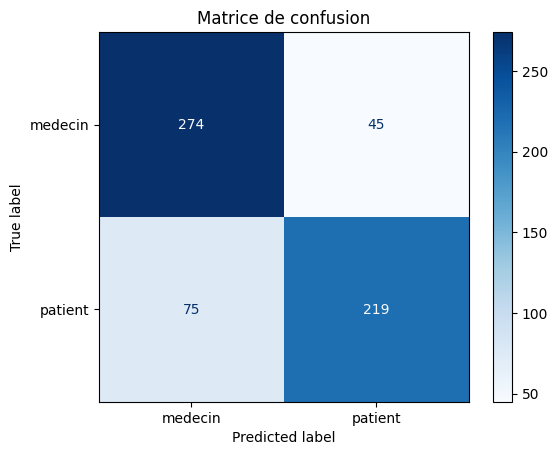


Nombre de caractéristiques sélectionnées: 2625


['lr.pkl']

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
import joblib
import matplotlib.pyplot as plt
import numpy as np

X = np.load('X_tfidf.npy')
y = np.load('y_encoded.npy')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegression(penalty='l1', solver='saga', random_state=42))),
    ('classifier', LogisticRegression(random_state=42))
])

param_grid = {
    'feature_selection__threshold': ['mean', 'median'],
    'classifier__penalty': ['l2', 'elasticnet'],
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['saga'],
    'classifier__max_iter': [1000],
    'classifier__class_weight': ['balanced'],
    'classifier__l1_ratio': [0.2, 0.5, 0.8]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=3,
    scoring='balanced_accuracy'
)

grid_search.fit(X_train, y_train)

print(f"\nMeilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleur score CV : {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nRésultats sur l'ensemble de test:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nRapport de classification:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

feature_selector = best_model.named_steps['feature_selection']
selected_features_mask = feature_selector.get_support()
n_selected_features = selected_features_mask.sum()
print(f"\nNombre de caractéristiques sélectionnées: {n_selected_features}")

joblib.dump(best_model, 'lr.pkl')

Conception de modele BERT et amélioration

In [ ]:
import torch
from transformers import CamembertTokenizer, CamembertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import torch.nn.functional as F
from tqdm import tqdm
import wandb

class SAMUDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, prompt_style="default", max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.prompt_style = prompt_style

    def __len__(self):
        return len(self.texts)

    def add_prompt(self, text):
        prompts = {
            "default": text,
            "question": f"Est-ce que cette phrase vient d'un médecin ou d'un patient ? : {text}",
            "context": f"Dans le contexte d'un appel au SAMU, analyser qui parle : {text}",
            "role": f"Identifier le rôle du locuteur (médecin/patient) : {text}"
        }
        return prompts.get(self.prompt_style, text)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        text = self.add_prompt(text)
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def prepare_data(discussions_samu):
    texts = []
    labels = []
    for discussion in discussions_samu:
        for speaker, phrases in discussion.items():
            if speaker in ['medecin', 'patient']:
                for phrase in phrases:
                    if isinstance(phrase, str) and phrase.strip():
                        texts.append(phrase)
                        labels.append(1 if speaker == 'medecin' else 0)
    return texts, labels

def train_model_with_temperature(model, train_loader, val_loader, device, temperature, num_epochs=3):
    model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)
    best_val_accuracy = 0

    train_results = []
    val_results = []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0
        train_predictions = []
        train_labels_list = []

        for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            logits = outputs.logits / temperature
            loss = F.cross_entropy(logits, labels)
            total_train_loss += loss.item()

            loss.backward()
            optimizer.step()

            predictions = torch.argmax(logits, dim=1)
            train_predictions.extend(predictions.cpu().numpy())
            train_labels_list.extend(labels.cpu().numpy())

        scheduler.step()

        val_predictions, val_labels_list, val_loss = evaluate_model(model, val_loader, device, temperature)

        train_accuracy = accuracy_score(train_labels_list, train_predictions)
        val_accuracy = accuracy_score(val_labels_list, val_predictions)

        print(f'\nEpoch {epoch+1}:')
        print(f'Temperature: {temperature}')
        print(f'Training Loss: {total_train_loss/len(train_loader):.4f}')
        print(f'Training Accuracy: {train_accuracy:.4f}')
        print(f'Validation Loss: {val_loss/len(val_loader):.4f}')
        print(f'Validation Accuracy: {val_accuracy:.4f}')

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), f'best_model_temp_{temperature}.pt')

        train_results.append({
            'predictions': train_predictions,
            'labels': train_labels_list,
            'accuracy': train_accuracy
        })

        val_results.append({
            'predictions': val_predictions,
            'labels': val_labels_list,
            'accuracy': val_accuracy
        })

    return train_results, val_results, best_val_accuracy

def evaluate_model(model, data_loader, device, temperature=1.0):
    model.eval()
    predictions = []
    true_labels = []
    total_loss = 0

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            logits = outputs.logits / temperature
            loss = F.cross_entropy(logits, labels)
            total_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels, total_loss

texts, labels = prepare_data(discussions_samu)
X_train, X_val, y_train, y_val = train_test_split(texts, labels, test_size=0.2, random_state=42)

model_name = 'camembert/camembert-base'
tokenizer = CamembertTokenizer.from_pretrained(model_name)
model = CamembertForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False
)

train_dataset = SAMUDataset(X_train, y_train, tokenizer)
val_dataset = SAMUDataset(X_val, y_val, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

temperatures = [0.5, 1.0, 2.0]
results = {}

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for temp in temperatures:
    print(f"\nTraining with temperature: {temp}")
    model = CamembertForSequenceClassification.from_pretrained(
        model_name,
        num_labels=2,
        output_attentions=False,
        output_hidden_states=False
    )

    train_results, val_results, best_val_accuracy = train_model_with_temperature(
        model, train_loader, val_loader, device, temperature=temp
    )

    results[temp] = {
        'train_results': train_results,
        'val_results': val_results,
        'best_val_accuracy': best_val_accuracy
    }

best_temp = max(results.items(), key=lambda x: x[1]['best_val_accuracy'])
print("\nMeilleure configuration:")
print(f"Temperature: {best_temp[0]}")
print(f"Best Validation Accuracy: {best_temp[1]['best_val_accuracy']:.4f}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/509 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert/camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training with temperature: 0.5


Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert/camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3 - Training: 100%|██████████| 153/153 [00:52<00:00,  2.89it/s]



Epoch 1:
Temperature: 0.5
Training Loss: 0.4993
Training Accuracy: 0.7545
Validation Loss: 0.4167
Validation Accuracy: 0.8075


Epoch 2/3 - Training: 100%|██████████| 153/153 [00:50<00:00,  3.02it/s]



Epoch 2:
Temperature: 0.5
Training Loss: 0.3492
Training Accuracy: 0.8358
Validation Loss: 0.3740
Validation Accuracy: 0.8222


Epoch 3/3 - Training: 100%|██████████| 153/153 [00:50<00:00,  3.00it/s]



Epoch 3:
Temperature: 0.5
Training Loss: 0.2907
Training Accuracy: 0.8713
Validation Loss: 0.3722
Validation Accuracy: 0.8238

Training with temperature: 1.0


Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert/camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3 - Training: 100%|██████████| 153/153 [00:50<00:00,  3.01it/s]



Epoch 1:
Temperature: 1.0
Training Loss: 0.5344
Training Accuracy: 0.7500
Validation Loss: 0.4037
Validation Accuracy: 0.8026


Epoch 2/3 - Training: 100%|██████████| 153/153 [00:50<00:00,  3.00it/s]



Epoch 2:
Temperature: 1.0
Training Loss: 0.3674
Training Accuracy: 0.8333
Validation Loss: 0.4009
Validation Accuracy: 0.7896


Epoch 3/3 - Training: 100%|██████████| 153/153 [00:50<00:00,  3.01it/s]



Epoch 3:
Temperature: 1.0
Training Loss: 0.3051
Training Accuracy: 0.8578
Validation Loss: 0.3835
Validation Accuracy: 0.8238

Training with temperature: 2.0


Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert/camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3 - Training: 100%|██████████| 153/153 [00:51<00:00,  3.00it/s]



Epoch 1:
Temperature: 2.0
Training Loss: 0.5722
Training Accuracy: 0.7173
Validation Loss: 0.4660
Validation Accuracy: 0.7961


Epoch 2/3 - Training: 100%|██████████| 153/153 [00:50<00:00,  3.02it/s]



Epoch 2:
Temperature: 2.0
Training Loss: 0.4024
Training Accuracy: 0.8260
Validation Loss: 0.4076
Validation Accuracy: 0.8222


Epoch 3/3 - Training: 100%|██████████| 153/153 [00:51<00:00,  3.00it/s]



Epoch 3:
Temperature: 2.0
Training Loss: 0.3258
Training Accuracy: 0.8632
Validation Loss: 0.4108
Validation Accuracy: 0.8271

Meilleure configuration:
Temperature: 2.0
Best Validation Accuracy: 0.8271


Evaluation de notre modele BERT


Évaluation pour le prompt : default

 Évaluation avec température : 0.5


<ipython-input-7-e974d74af485>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_temp_{temp}.pt'))


Accuracy : 0.8238


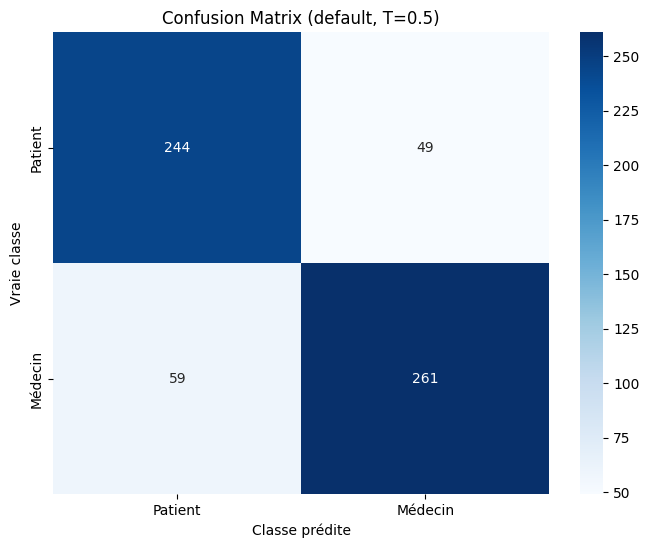


 Évaluation avec température : 1.0


<ipython-input-7-e974d74af485>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_temp_{temp}.pt'))


Accuracy : 0.8238


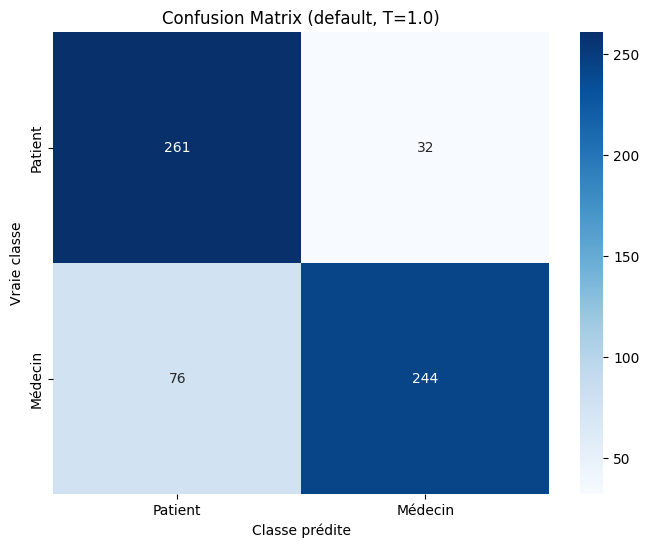


 Évaluation avec température : 2.0


<ipython-input-7-e974d74af485>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_temp_{temp}.pt'))


Accuracy : 0.8271


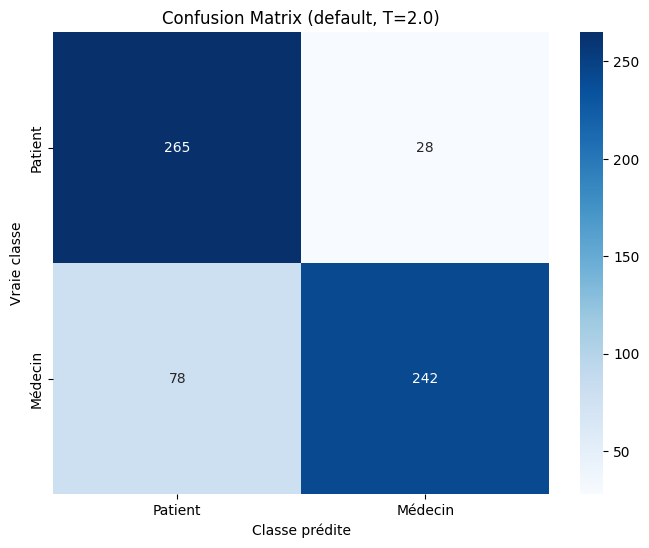


Évaluation pour le prompt : question

 Évaluation avec température : 0.5


<ipython-input-7-e974d74af485>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_temp_{temp}.pt'))


Accuracy : 0.5905


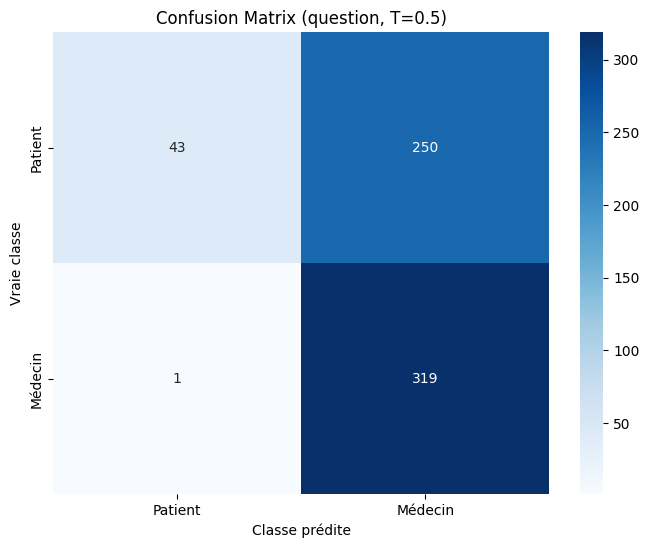


 Évaluation avec température : 1.0


<ipython-input-7-e974d74af485>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_temp_{temp}.pt'))


Accuracy : 0.6672


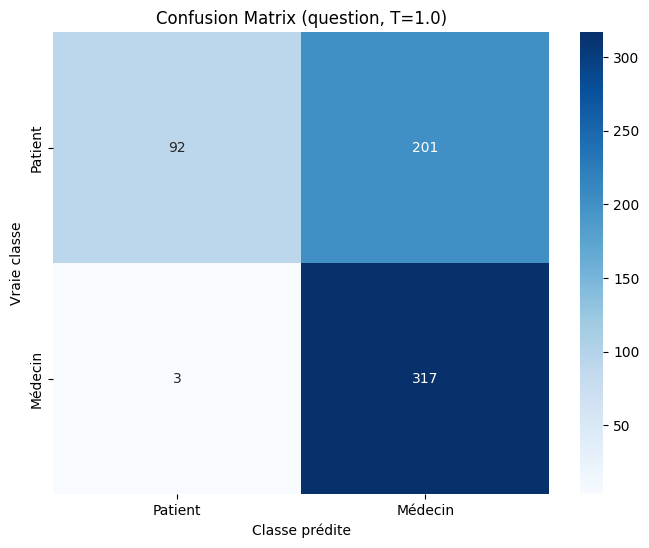


 Évaluation avec température : 2.0


<ipython-input-7-e974d74af485>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_temp_{temp}.pt'))


Accuracy : 0.6509


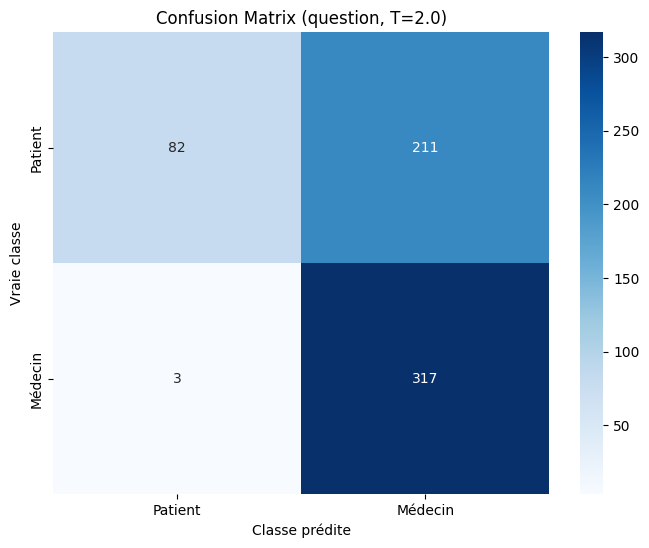


Évaluation pour le prompt : context

 Évaluation avec température : 0.5


<ipython-input-7-e974d74af485>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_temp_{temp}.pt'))


Accuracy : 0.7194


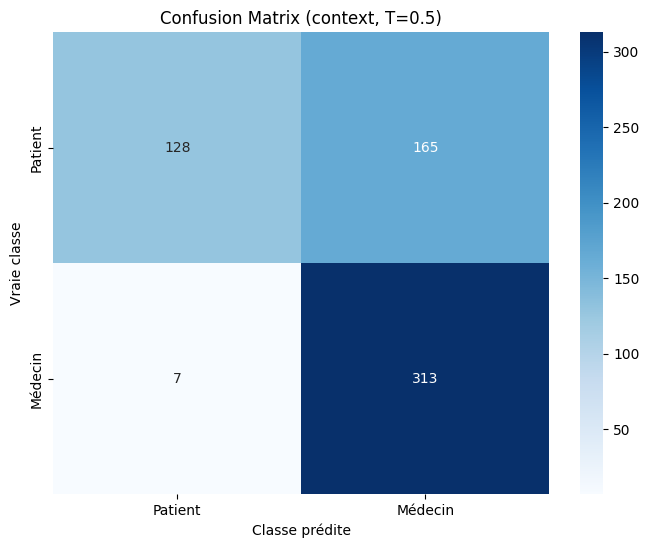


 Évaluation avec température : 1.0


<ipython-input-7-e974d74af485>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_temp_{temp}.pt'))


Accuracy : 0.7471


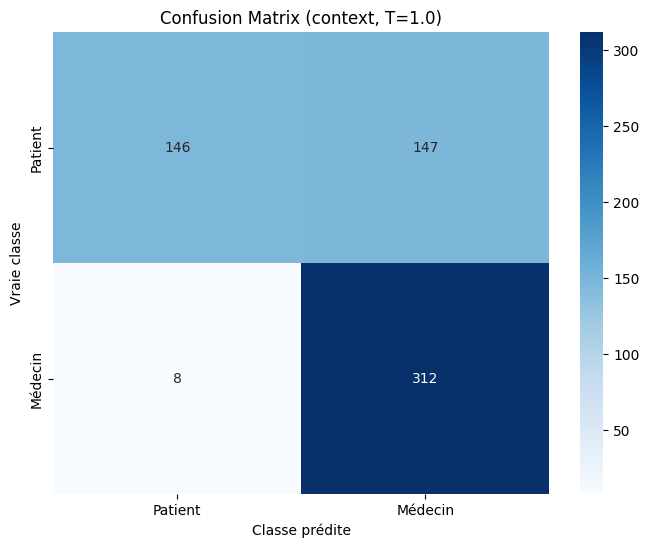


 Évaluation avec température : 2.0


<ipython-input-7-e974d74af485>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_temp_{temp}.pt'))


Accuracy : 0.6542


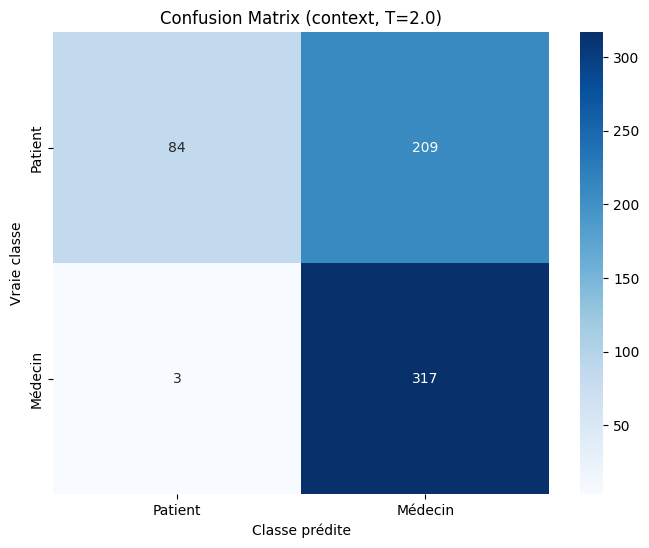


Évaluation pour le prompt : role

 Évaluation avec température : 0.5


<ipython-input-7-e974d74af485>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_temp_{temp}.pt'))


Accuracy : 0.7618


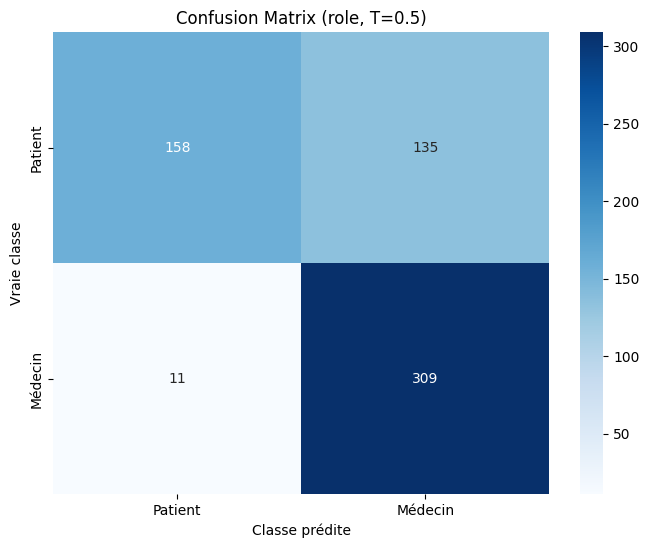


 Évaluation avec température : 1.0


<ipython-input-7-e974d74af485>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_temp_{temp}.pt'))


Accuracy : 0.7455


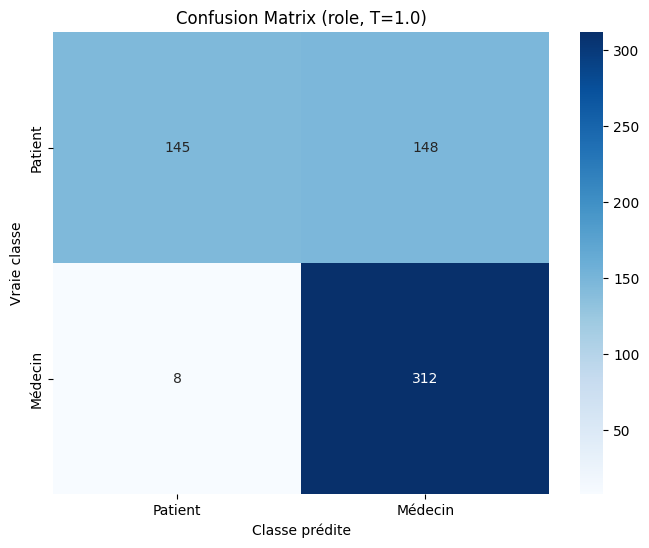


 Évaluation avec température : 2.0


<ipython-input-7-e974d74af485>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_temp_{temp}.pt'))


Accuracy : 0.6966


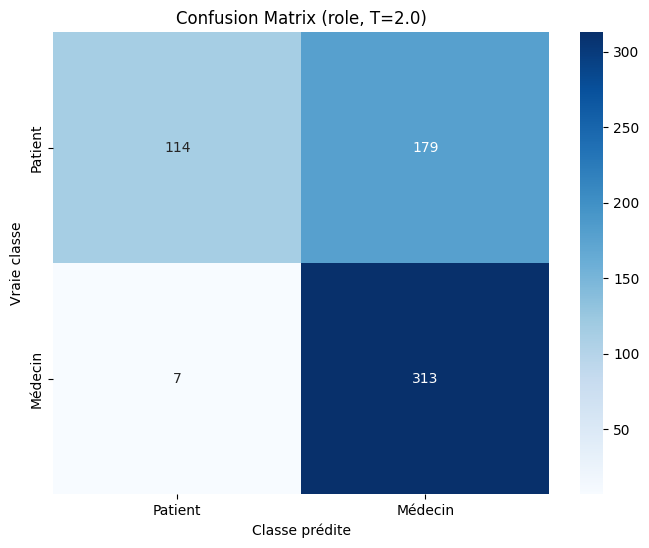


Meilleure configuration :
Prompt : default
Température : 2.0
Accuracy : 0.8271


<ipython-input-7-e974d74af485>:81: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_temp_{best_temp}.pt'))



Accuracy finale avec le meilleur prompt (default) et température (2.0): 0.8271


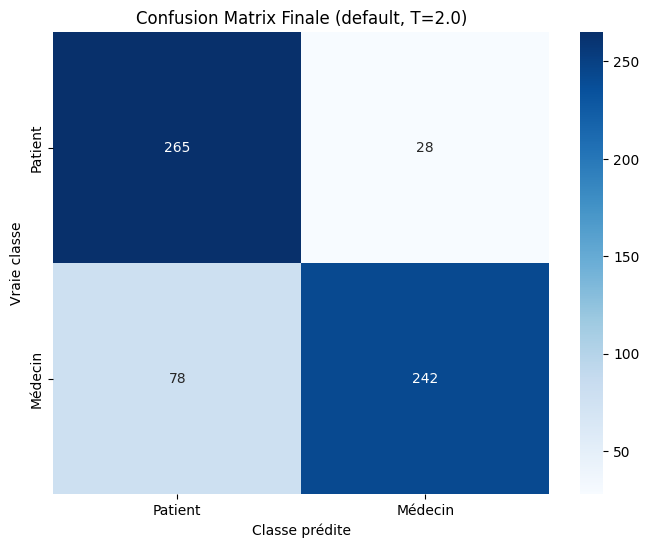

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model_with_temperature(model, data_loader, device, temperature=1.0):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            logits = outputs.logits / temperature
            preds = torch.argmax(logits, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(true_labels, predictions)
    return accuracy, true_labels, predictions

def plot_confusion_matrix(true_labels, predictions, title="Confusion Matrix"):
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Patient', 'Médecin'],
                yticklabels=['Patient', 'Médecin'])
    plt.title(title)
    plt.ylabel('Vraie classe')
    plt.xlabel('Classe prédite')
    plt.show()

prompt_styles = ["default", "question", "context", "role"]
best_prompt = None
best_accuracy = 0
results_by_prompt = {}

for prompt_style in prompt_styles:
    print(f"\nÉvaluation pour le prompt : {prompt_style}")
    train_dataset.prompt_style = prompt_style
    val_dataset.prompt_style = prompt_style

    for temp in temperatures:
        print(f"\n Évaluation avec température : {temp}")
        model.load_state_dict(torch.load(f'best_model_temp_{temp}.pt'))
        model.to(device)

        val_accuracy, true_labels, predictions = evaluate_model_with_temperature(
            model, val_loader, device, temperature=temp
        )

        print(f"Accuracy : {val_accuracy:.4f}")

        plot_confusion_matrix(
            true_labels, predictions,
            title=f"Confusion Matrix ({prompt_style}, T={temp})"
        )

        results_by_prompt[(prompt_style, temp)] = val_accuracy
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_prompt = (prompt_style, temp)

print("\nMeilleure configuration :")
print(f"Prompt : {best_prompt[0]}")
print(f"Température : {best_prompt[1]}")
print(f"Accuracy : {best_accuracy:.4f}")

best_prompt_style, best_temp = best_prompt
train_dataset.prompt_style = best_prompt_style
val_dataset.prompt_style = best_prompt_style

model.load_state_dict(torch.load(f'best_model_temp_{best_temp}.pt'))
model.to(device)

val_accuracy, true_labels, predictions = evaluate_model_with_temperature(
    model, val_loader, device, temperature=best_temp
)

print(f"\nAccuracy finale avec le meilleur prompt ({best_prompt_style}) et température ({best_temp}): {val_accuracy:.4f}")
plot_confusion_matrix(
    true_labels, predictions,
    title=f"Confusion Matrix Finale ({best_prompt_style}, T={best_temp})"
)
